## 01장. 클러스터링
### 4. 가우시안 혼합모형과 EM방법

#### 가우시안 혼합모형

    - 데이터 하나가 어떠한 군집에 속할지 명확히 구별하기 어려울 때 가우시안 믹스쳐 모델 GMM로 각 군집에 소속될 확률 값을 알 수 있다.

#### EM방법 expectation-maximization

    - 혼합모형의 모수추정에서 중요한 역할을 하는 것 중의 하나가 바로 각 데이터가 어떤 카테고리에 속하는가를 알려주는 조건부 확률  p(z|x) 값이다. 이 값을 responsibility라고 한다.

    - E step : 각 데이터가 어떤 카테고리에 속하는지 알려주는 확률(responsibility) 구하기

> $(\theta_{k}, \mu_{k},\Sigma_{k})$ 로 $\gamma _{ik}$ 구하기 

    - M step : 각 데이터가 어떤 카테고리에 속할지의 확률을 이용해서 모수 추정하기

> $\gamma _{ik}$ 로  $(\theta_{k}, \mu_{k},\Sigma_{k})$ 구하기



EM을 계속 반복하면서 $\gamma _{ik}$와 $(\theta_{k}, \mu_{k},\Sigma_{k})$를 조금 더 정확하게 만들어 나간다.

#### Scikit-Learn의 GaussianMixture 클래스

In [2]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl

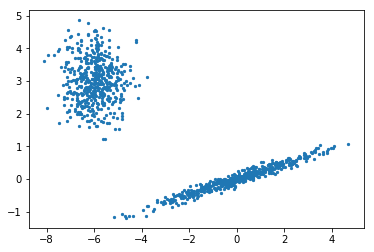

In [4]:
from numpy.random import randn

n_samples = 500

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0., -0.1], [1.7, .4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1,
          0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2,
         ]
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()

In [22]:
# 가우시안 믹스쳐 모델을 객체를 먼저 만든 후, 데이터를 넣어 fit을 한다.
model = GaussianMixture(n_components=2, init_params='random', random_state=0, max_iter=1)
model.fit(X)

/usr/local/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


GaussianMixture(covariance_type='full', init_params='random', max_iter=1,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [23]:
# 각 군집에 소속될 확률 responsibility 계산해준다.
gamma = model.predict_proba(X)

In [24]:
gamma

array([[0.50670305, 0.49329695],
       [0.55409475, 0.44590525],
       [0.50184734, 0.49815266],
       ...,
       [0.48580584, 0.51419416],
       [0.4893519 , 0.5106481 ],
       [0.49036003, 0.50963997]])

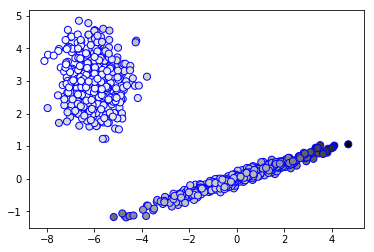

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=gamma[:, 0])
plt.show()

In [8]:
def plot_gaussianmixture(n, k=10):
    model = GaussianMixture(n_components=2, init_params='random', random_state=1, tol=1e-9, max_iter=n)
    model.fit(X)
    gamma = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=gamma[:, 0])
    plt.show()
    return model

/usr/local/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


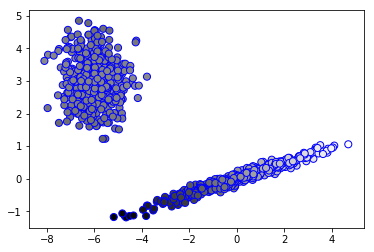

In [16]:
plot_gaussianmixture(5);

/usr/local/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


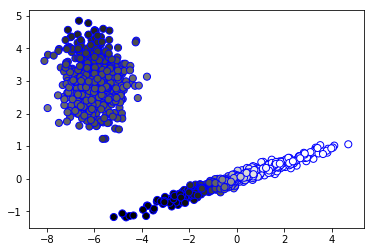

In [10]:
plot_gaussianmixture(10);

/usr/local/lib/python3.6/site-packages/sklearn/mixture/base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


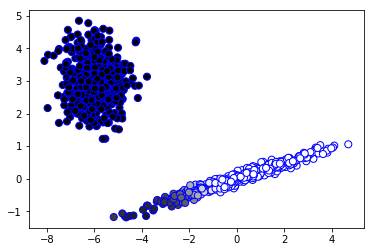

In [15]:
plot_gaussianmixture(15);

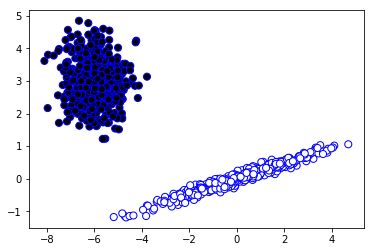

In [13]:
plot_gaussianmixture(20);